# Machine Learning Modeling Using SMOTE Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

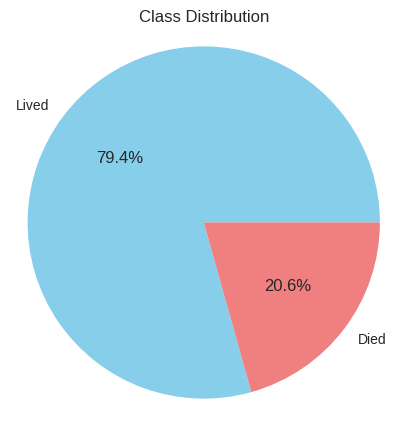

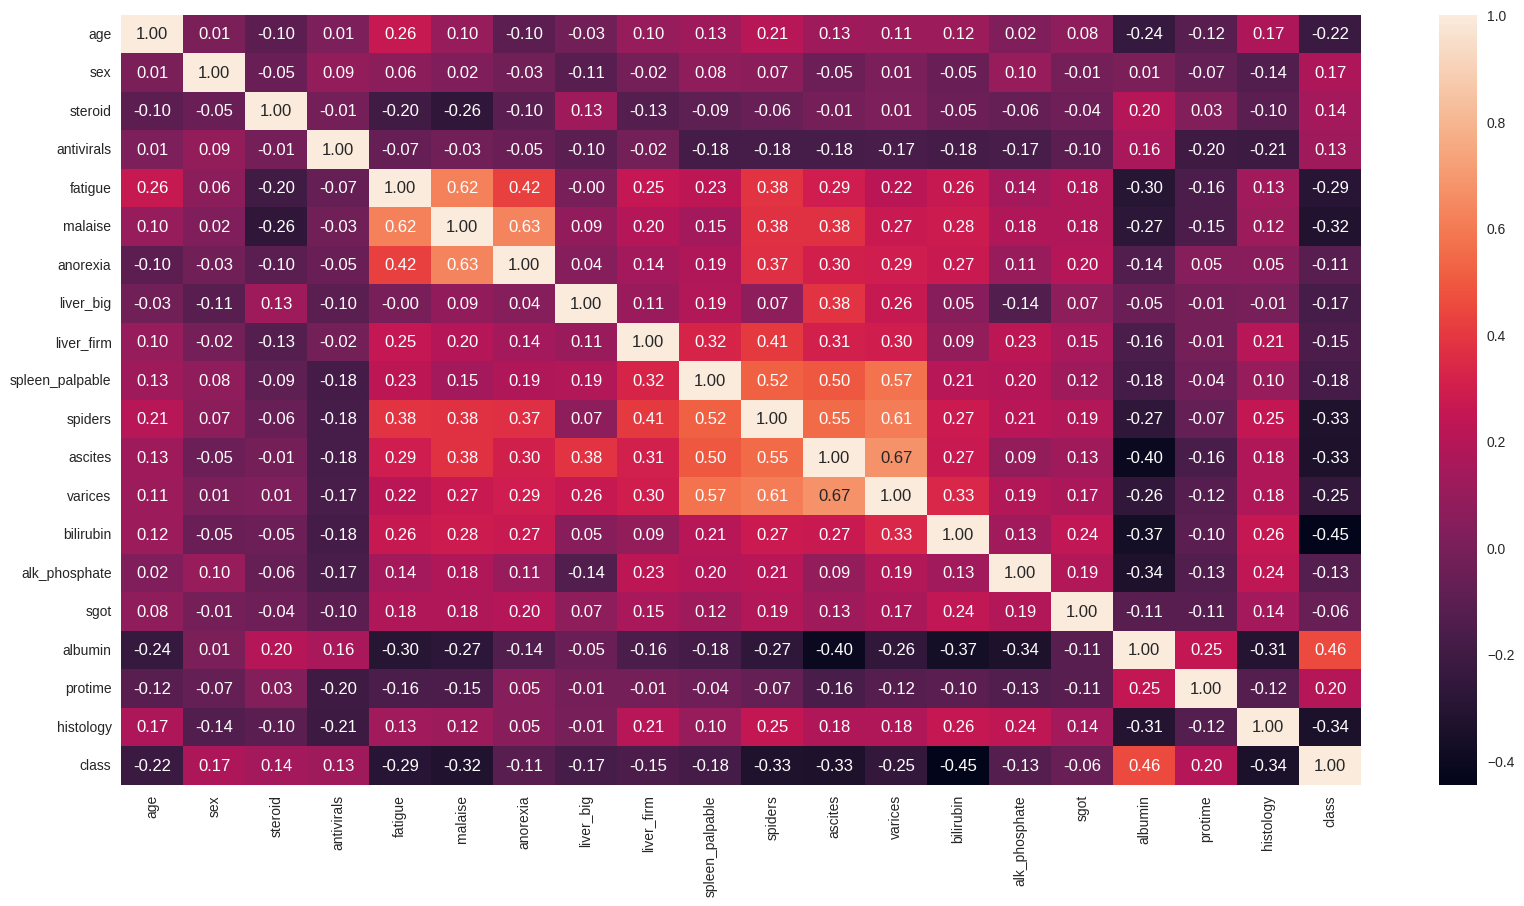

In [1]:
# Ensure matplotlib plots are displayed inline
%matplotlib inline

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pycaret.classification import *

# Import custom module for EDA
from EDA_Optimized import *


### Split the data into features and target

In [2]:
X = ds.drop("class", axis=1)
y = ds["class"]

### Instantiate and fit SMOTE

In [3]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

### Print class distribution before and after resampling

In [4]:
print("Class Distribution before Resampling: ", y.value_counts())
print("Class Distribution after Resampling: ", y_resampled.value_counts())

Class Distribution before Resampling:  class
1    123
0     32
Name: count, dtype: int64
Class Distribution after Resampling:  class
1    123
0    123
Name: count, dtype: int64


### Combine resampled features and target into a DataFrame

In [5]:
train_data = pd.concat([X_resampled, y_resampled], axis=1)

### Initialize PyCaret setup

In [6]:
s = setup(data=train_data, target='class', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(246, 20)"
4,Transformed data shape,"(246, 20)"
5,Transformed train set shape,"(172, 20)"
6,Transformed test set shape,"(74, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


### Compare models and select the best one

In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8667,0.9292,0.8708,0.8811,0.8701,0.7327,0.7418,0.1450
et,Extra Trees Classifier,0.8477,0.9367,0.7889,0.9084,0.8361,0.6929,0.7068,0.2250
ada,Ada Boost Classifier,0.8369,0.8954,0.8458,0.8479,0.8377,0.6707,0.6835,0.1420
rf,Random Forest Classifier,0.8310,0.9172,0.7667,0.8958,0.8220,0.6603,0.6726,0.2500
knn,K Neighbors Classifier,0.8258,0.9215,0.7208,0.9238,0.8019,0.6499,0.6722,0.0710
lightgbm,Light Gradient Boosting Machine,0.8255,0.8816,0.7917,0.8639,0.8201,0.6498,0.6597,2.0980
lr,Logistic Regression,0.8072,0.9052,0.7792,0.8433,0.8048,0.6117,0.6197,0.7220
ridge,Ridge Classifier,0.8023,0.8929,0.7681,0.8487,0.7978,0.6017,0.6139,0.0440
lda,Linear Discriminant Analysis,0.8023,0.8917,0.7681,0.8487,0.7978,0.6017,0.6139,0.0470
svm,SVM - Linear Kernel,0.7843,0.8904,0.7542,0.8119,0.7793,0.5653,0.5696,0.0440


In [8]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Evaluate the best model

In [9]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Plot various aspects of the best model

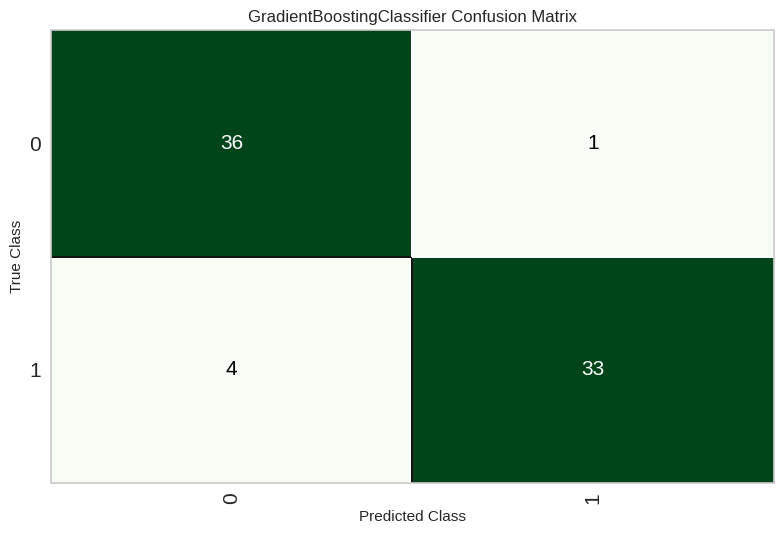

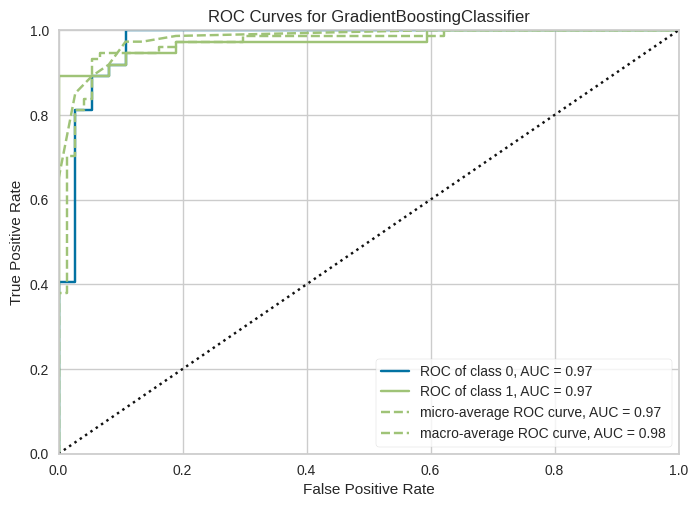

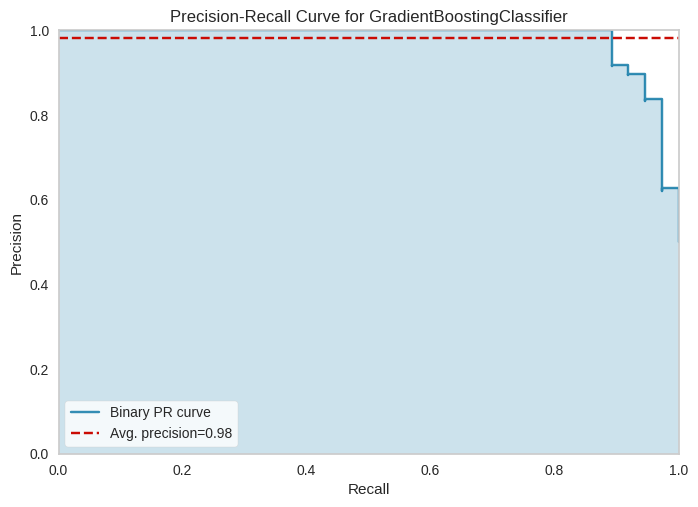

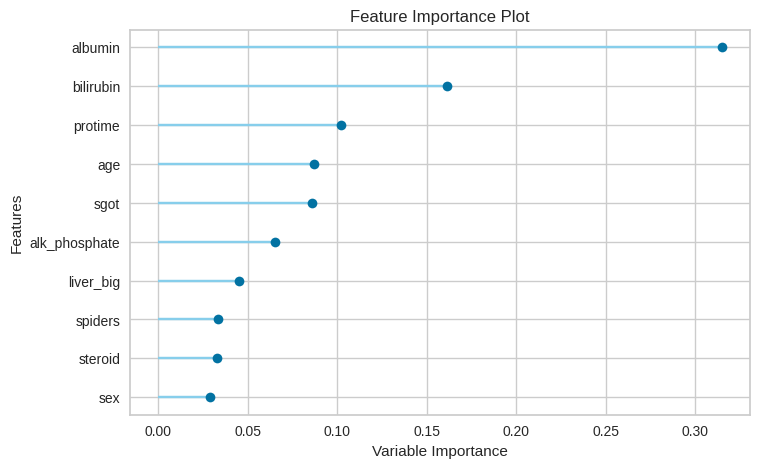

In [10]:
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')
plot_model(best_model, plot='pr')
plot_model(best_model, plot='feature')

### Making Predictions

In [11]:
predictions = predict_model(best_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9324,0.9737,0.8919,0.9706,0.9296,0.8649,0.8677


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score
111,42,0,0,1,1,1,0,1,0,0,...,0,0.500000,62.000000,68.00000,3.800000,29.0,1,0,0,0.9072
110,7,0,1,0,0,0,0,1,1,1,...,0,0.700000,256.000000,25.00000,4.200000,100.0,1,1,1,0.5578
132,48,0,1,0,1,1,1,1,1,0,...,0,2.000000,158.000000,278.00000,3.800000,100.0,1,1,1,0.8788
203,45,0,0,0,1,0,0,1,0,0,...,0,0.740924,73.341576,25.18152,4.129538,100.0,0,0,0,0.9708
130,54,0,1,0,0,0,0,1,0,0,...,0,1.000000,85.000000,30.00000,4.500000,0.0,1,1,1,0.7162


### Displaying the probability of both classes

In [12]:
predictions_prob = predict_model(best_model, raw_score=True)
predictions_prob.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9324,0.9737,0.8919,0.9706,0.9296,0.8649,0.8677


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score_0,prediction_score_1
111,42,0,0,1,1,1,0,1,0,0,...,0.500000,62.000000,68.00000,3.800000,29.0,1,0,0,0.9072,0.0928
110,7,0,1,0,0,0,0,1,1,1,...,0.700000,256.000000,25.00000,4.200000,100.0,1,1,1,0.4422,0.5578
132,48,0,1,0,1,1,1,1,1,0,...,2.000000,158.000000,278.00000,3.800000,100.0,1,1,1,0.1212,0.8788
203,45,0,0,0,1,0,0,1,0,0,...,0.740924,73.341576,25.18152,4.129538,100.0,0,0,0,0.9708,0.0292
130,54,0,1,0,0,0,0,1,0,0,...,1.000000,85.000000,30.00000,4.500000,0.0,1,1,1,0.2838,0.7162


# Save the best model


In [13]:
save_model(best_model, "smote_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'steroid',
                                              'antivirals', 'fatigue', 'malaise',
                                              'anorexia', 'liver_big',
                                              'liver_firm', 'spleen_palpable',
                                              'spiders', 'ascites', 'varices',
                                              'bilirubin', 'alk_phosphate',
                                              'sgot', 'albumin', 'protime',
                                              'histology'],
                                     transformer=SimpleImputer(add_indica...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                    